Импортируем нужные библиотеки и загружаем датасет.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
sns.set_style("whitegrid") 
sns.set_context("notebook", font_scale=1.2)

In [66]:
all_data = pd.read_excel('Raw Data.xlsx', sheet_name=None)

In [67]:
orders    = all_data['orders']
customers = all_data['customers']
products  = all_data['products']

In [68]:
orders.sample(3)

,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Country,Coffee Type,Roast Type,Size,Unit Price,Sales
43,ULR-52653-960,2021-10-04,04152-34436-IE,L-L-2.5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,WOQ-36015-429,2021-09-25,51427-89175-QJ,L-M-0.5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,CGO-79583-871,2019-03-04,37182-54930-XC,E-D-0.5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
customers.sample(3)

,Customer ID,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card
288,17649-28133-PY,Mathew Goulter,NaN,+353 (968) 887-1849,3 Sunfield Terrace,Kinlough,Ireland,F94,Yes
205,24766-58139-GT,Kendra Glison,NaN,+1 (202) 137-6867,1 Kipling Lane,Washington,United States,20337,Yes
271,76624-72205-CK,Jasper Sisneros,jsisneros7j@a8.net,+1 (919) 448-8909,38 Dryden Plaza,Raleigh,United States,27635,Yes


In [70]:
products.sample(3)

,Product ID,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
23,R-D-2.5,Rob,D,2.5,20.585,0.8234,1.23510
24,L-L-0.2,Lib,L,0.2,4.755,2.3775,0.61815
13,R-L-0.5,Rob,L,0.5,7.170,1.4340,0.43020


Проверим, есть ли дубликаты, пропущенные значения и какие-либо аномалии в данных.

In [72]:
print(orders.duplicated().sum(), customers.duplicated().sum(), products.duplicated().sum())

0 0 0


In [73]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       1000 non-null   object        
 1   Order Date     1000 non-null   datetime64[ns]
 2   Customer ID    1000 non-null   object        
 3   Product ID     1000 non-null   object        
 4   Quantity       1000 non-null   int64         
 5   Customer Name  0 non-null      float64       
 6   Email          0 non-null      float64       
 7   Country        0 non-null      float64       
 8   Coffee Type    0 non-null      float64       
 9   Roast Type     0 non-null      float64       
 10  Size           0 non-null      float64       
 11  Unit Price     0 non-null      float64       
 12  Sales          0 non-null      float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(3)
memory usage: 101.7+ KB


In [74]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     1000 non-null   object
 1   Customer Name   1000 non-null   object
 2   Email           796 non-null    object
 3   Phone Number    870 non-null    object
 4   Address Line 1  1000 non-null   object
 5   City            1000 non-null   object
 6   Country         1000 non-null   object
 7   Postcode        1000 non-null   object
 8   Loyalty Card    1000 non-null   object
dtypes: object(9)
memory usage: 70.4+ KB


In [75]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product ID      48 non-null     object 
 1   Coffee Type     48 non-null     object 
 2   Roast Type      48 non-null     object 
 3   Size            48 non-null     float64
 4   Unit Price      48 non-null     float64
 5   Price per 100g  48 non-null     float64
 6   Profit          48 non-null     float64
dtypes: float64(4), object(3)
memory usage: 2.8+ KB


In [76]:
orders.describe()

,Order Date,Quantity,Customer Name,Email,Country,Coffee Type,Roast Type,Size,Unit Price,Sales
count,1000,1000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2020-11-06 21:07:12,3.551000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2019-01-02 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2019-12-17 00:00:00,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2020-12-02 12:00:00,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2021-10-02 06:00:00,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2022-08-19 00:00:00,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.681733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
products.describe()

,Size,Unit Price,Price per 100g,Profit
count,48.000000,48.000000,48.000000,48.000000
mean,1.050000,13.046250,1.435087,1.316219
std,0.893951,9.953578,0.371981,1.161426
min,0.200000,2.685000,0.823400,0.161100
25%,0.425000,5.216250,1.191400,0.501300
50%,0.750000,9.230000,1.370600,0.943800
75%,1.375000,17.033750,1.659375,1.657700
max,2.500000,36.455000,2.377500,4.739150


Объединяем датафреймы.

In [79]:
sales = orders[['Order ID', 'Order Date', 'Customer ID', 'Product ID', 'Quantity']].merge(customers, on='Customer ID', how='left')\
        .merge(products, on='Product ID', how='left')

Нужно определить, какой тип кофе самый прибыльный, и предположить, как можно было бы оптимизировать цены.

Посмотрим на количество заказов с течением времени для каждого типа кофе.

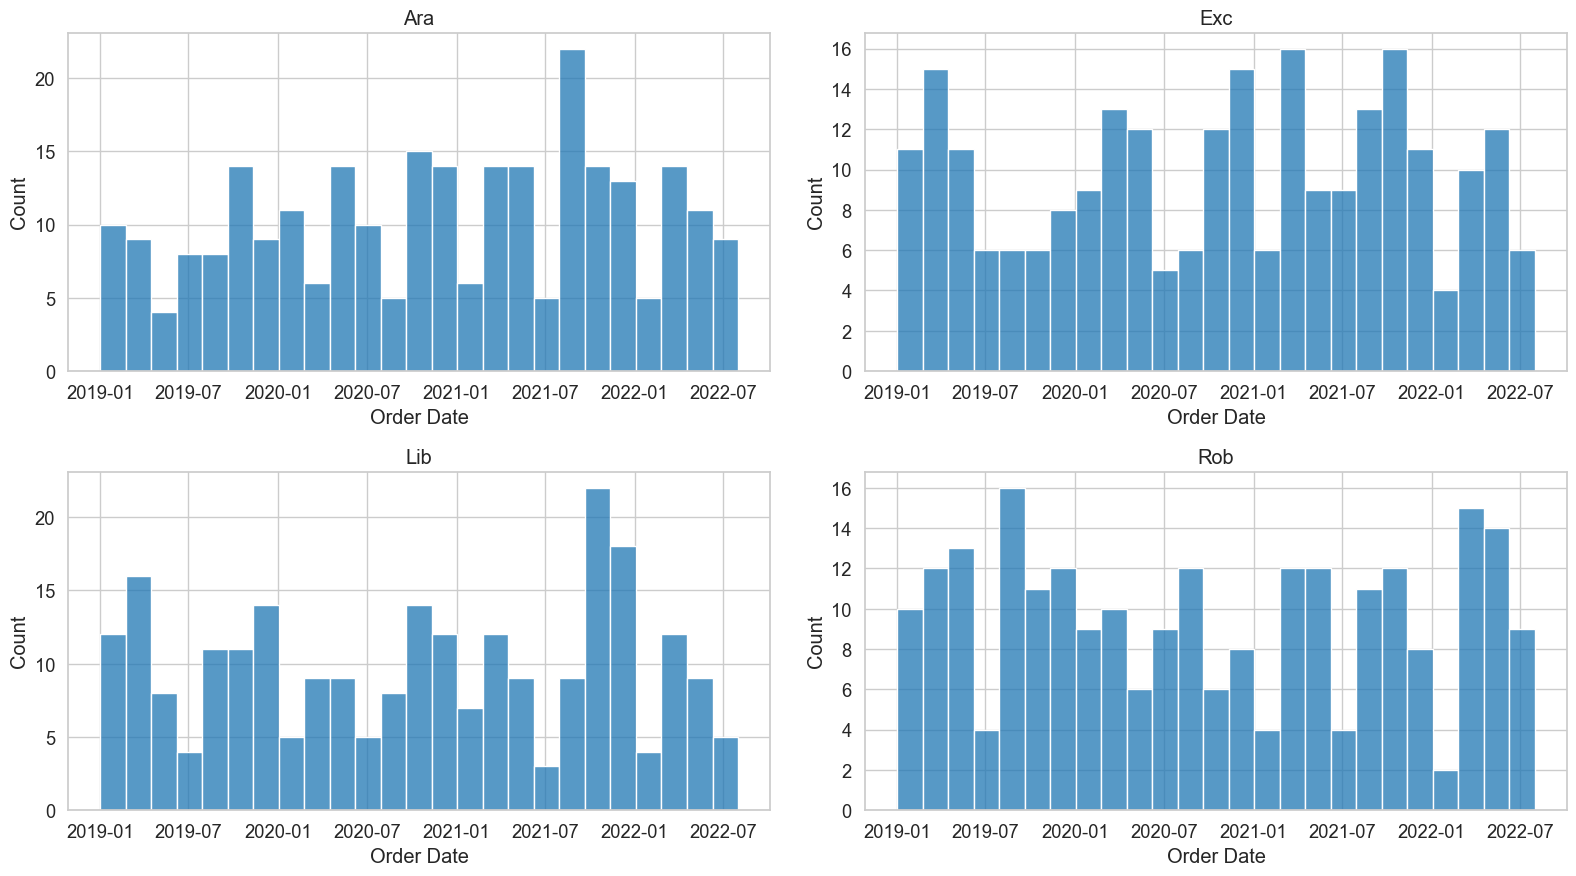

In [82]:
plt.figure(figsize=(16, 9))
plt.subplot(2, 2, 1)
sns.histplot(sales.loc[sales['Coffee Type']=='Ara', 'Order Date'].dt.to_period('M').dt.to_timestamp(), bins=25)
plt.title('Ara')
plt.subplot(2, 2, 2)
sns.histplot(sales.loc[sales['Coffee Type']=='Exc', 'Order Date'].dt.to_period('M').dt.to_timestamp(), bins=25)
plt.title('Exc')
plt.subplot(2, 2, 3)
sns.histplot(sales.loc[sales['Coffee Type']=='Lib', 'Order Date'].dt.to_period('M').dt.to_timestamp(), bins=25)
plt.title('Lib')
plt.subplot(2, 2, 4)
sns.histplot(sales.loc[sales['Coffee Type']=='Rob', 'Order Date'].dt.to_period('M').dt.to_timestamp(), bins=25)
plt.title('Rob')
plt.tight_layout()

У нас есть колонка "Profit", которая содержит прибыль, которую мы получаем с продажи единицы товара.
Посчитаем, чему равна прибыль относительно цены для каждого типа кофе.

In [84]:
products['Profit_margin'] = products['Profit']/products['Unit Price']
products.groupby('Coffee Type', as_index=False).Profit_margin.max()

,Coffee Type,Profit_margin
0,Ara,0.09
1,Exc,0.11
2,Lib,0.13
3,Rob,0.06


Посмотрим на количество проданных упаковок в зависимости от типа кофе.

In [86]:
quantity = sales.groupby('Coffee Type', as_index=False).Quantity.sum()
quantity

,Coffee Type,Quantity
0,Ara,947
1,Exc,872
2,Lib,854
3,Rob,878


<Axes: xlabel='Coffee Type', ylabel='Quantity'>

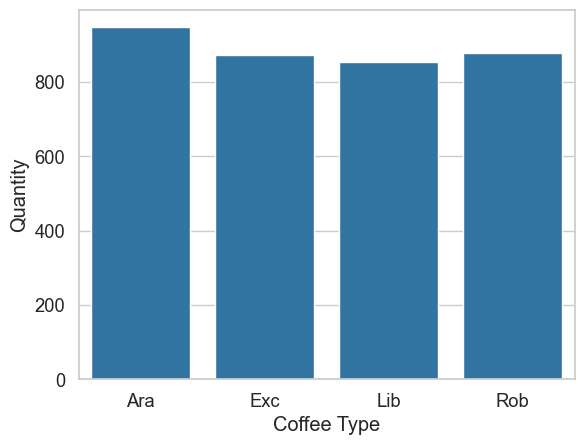

In [87]:
sns.barplot(x=quantity['Coffee Type'], y=quantity['Quantity'])

Посмотрим на общую прибыль для каждого типа кофе.

In [89]:
sales['Total_profit'] = sales['Quantity']*sales['Profit']

In [90]:
profit_sum = sales.groupby('Coffee Type', as_index=False).Total_profit.sum()
profit_sum

,Coffee Type,Total_profit
0,Ara,1059.16455
1,Exc,1353.70840
2,Lib,1567.02975
3,Rob,540.31470


<Axes: xlabel='Coffee Type', ylabel='Total_profit'>

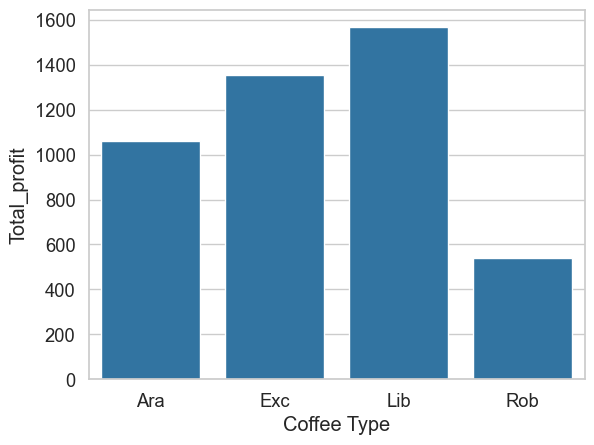

In [91]:
sns.barplot(x=profit_sum['Coffee Type'], y=profit_sum['Total_profit'])

Теперь посмотрим на средний чек для каждого типа кофе.

In [93]:
sales['Check'] = sales['Quantity']*sales['Unit Price']

In [94]:
average_check = sales.groupby('Coffee Type', as_index=False)['Check'].mean()
average_check

,Coffee Type,Check
0,Ara,44.577633
1,Exc,49.823644
2,Lib,48.605141
3,Rob,37.366162


<Axes: xlabel='Coffee Type', ylabel='Check'>

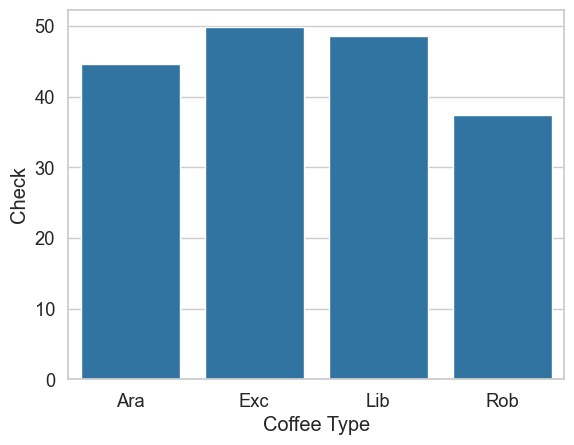

In [95]:
sns.barplot(x=average_check['Coffee Type'], y=average_check['Check'])

Итак, мы видим, что самый прибыльный тип кофе - 'Lib'. Меньше всего прибыли приносит кофе 'Rob'.
Можем заметить, что маржинальность кофе 'Ara' также сравнительно небольшая, при том что он лидирует по количеству покупок. Таким образом, мы можем сделать предположение о том, что повышение цен на кофе 'Ara' принесет больше прибыли, поскольку этот продукт самый популярный и, возможно, покупатели, которые не готовы платить за 'Ara' больше, станут покупать кофе 'Rob'. Необходимо протестировать ценовые изменения и оценить  реакцию на рынке.

In [104]:
sales.to_csv('sales.csv', index=False)